In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

### Idea

**Cel:** Znaleźć najlepszą linię prostą $y = ax + b$ do danych

**Jak?** Minimalizując sumę **kwadratów odchyleń** punktów od linii

$$\text{Minimalizuj: } SSE = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \sum_{i=1}^{n}(y_i - (ax_i + b))^2$$

gdzie:
- $y_i$ = rzeczywista wartość
- $\hat{y}_i = ax_i + b$ = wartość przewidziana przez model
- $(y_i - \hat{y}_i)$ = **residual** (reszta, błąd)

---

### Dlaczego kwadraty?

✅ **Zalety kwadratów:**
- Błędy dodatnie i ujemne się nie znoszą
- Większe kary za duże odchylenia
- Matematycznie wygodne (funkcja różniczkowalna)
- Rozwiązanie analityczne istnieje!

**Wzory na parametry:**
$$a = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$b = \bar{y} - a\bar{x}$$

slope: 1.88, intercept: 5.13


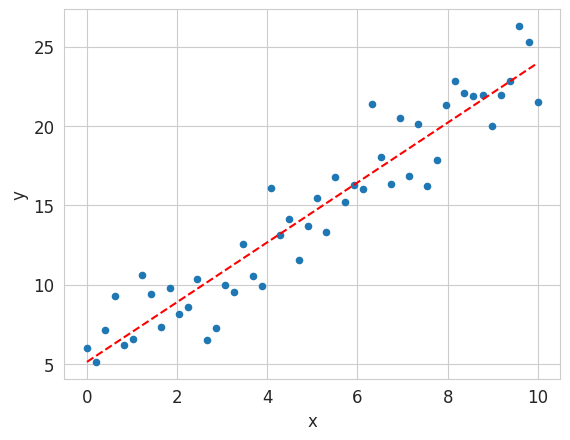

In [143]:
# Ustawienie seed dla powtarzalności
np.random.seed(42)

# Generowanie danych: y ≈ 2x + 5 + szum
n = 50
x = np.linspace(0, 10, n)
y_true = 2 * x + 5  # prawdziwa zależność
noise = np.random.normal(0, 2, n)  # losowy szum
y = y_true + noise

# Stworzenie DataFrame
data = pd.DataFrame({'x': x, 'y': y})


slope, intercept, r_value, p_value, std_err = stats.linregress(data.x, data.y)
print(f"slope: {slope:.2f}, intercept: {intercept:.2f}")
fig, ax = plt.subplots()
data.plot(kind="scatter", x='x', y='y', ax=ax)
y_linreg = slope*x + intercept
ax.plot(x, y_linreg, 'r--')

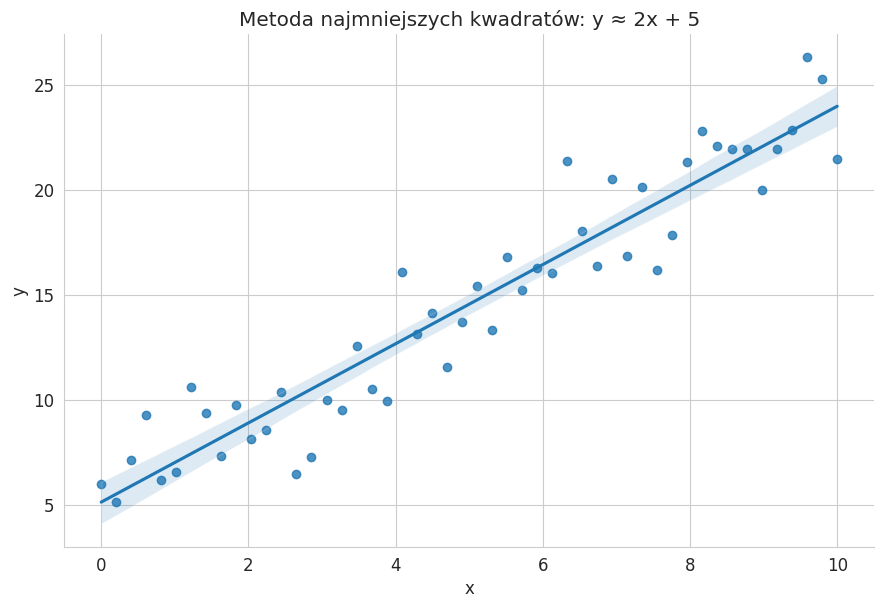

In [144]:
# Ustawienie seed dla powtarzalności
np.random.seed(42)

# Generowanie danych: y ≈ 2x + 5 + szum
n = 50
x = np.linspace(0, 10, n)
y_true = 2 * x + 5  # prawdziwa zależność
noise = np.random.normal(0, 2, n)  # losowy szum
y = y_true + noise

# Stworzenie DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Wykres z dopasowaniem linii prostej
sns.lmplot(data=data, x='x', y='y', height=6, aspect=1.5)
plt.title('Metoda najmniejszych kwadratów: y ≈ 2x + 5')
plt.show()

# Metoda najmniejszych kwadratów metodą macierzową

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


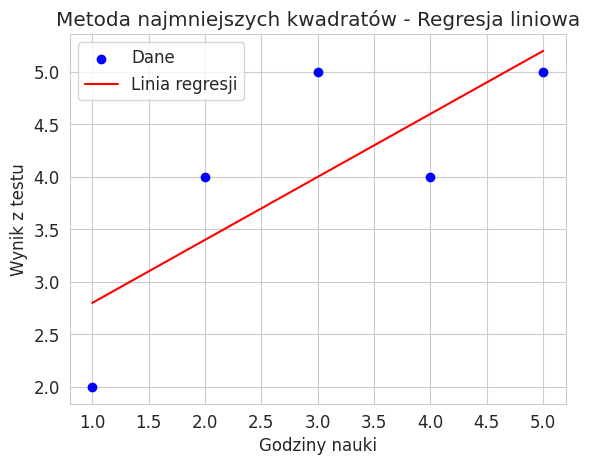

In [145]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [146]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

(np.float64(0.28284271247461895), np.float64(0.9380831519646857))

In [147]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

np.float64(0.7745966692414834)

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



Zadanie 1:
a = 1.9383 ± 0.0483
b = 5.5235 ± 0.2612


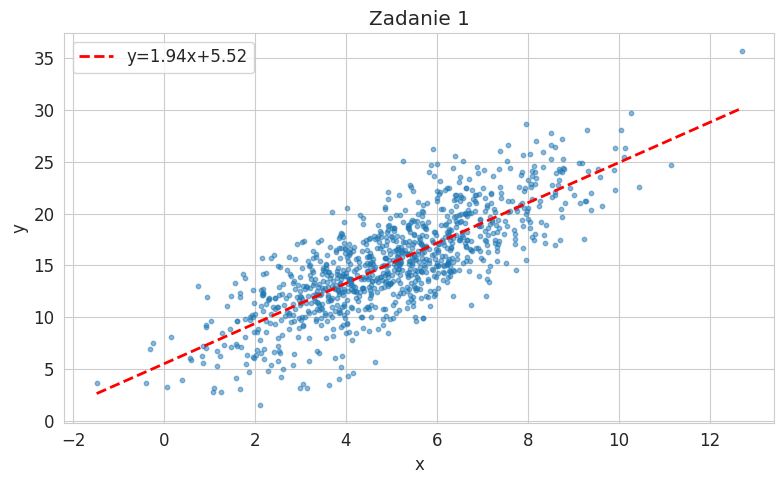

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# ---------- Zadanie 1 ----------
np.random.seed(42)
n = 1000
x = np.random.normal(5, 2, n)
a_true, b_true = 2, 5
y = a_true * x + b_true + np.random.normal(0, 3, n)

df1 = pd.DataFrame({'x': x, 'y': y})

p, cov = np.polyfit(df1['x'], df1['y'], 1, cov=True)
a, b = p
err_a, err_b = np.sqrt(np.diag(cov))

print("Zadanie 1:")
print(f"a = {a:.4f} ± {err_a:.4f}")
print(f"b = {b:.4f} ± {err_b:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(df1['x'], df1['y'], s=10, alpha=0.5)
xx = np.linspace(df1['x'].min(), df1['x'].max(), 200)
plt.plot(xx, a*xx + b, 'r--', lw=2, label=f'y={a:.2f}x+{b:.2f}')
plt.title('Zadanie 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()


Zadanie 2:
   PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1


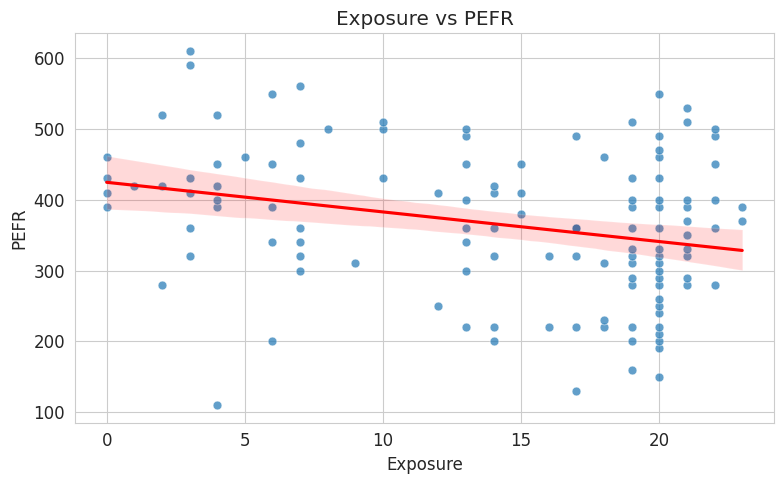

r = -0.2770, p = 2.0084e-03
a = -4.1846 ± 1.3250
b = 424.5828 ± 20.7960
PEFR maleje z Exposure
Odstające punkty:
     PEFR  Exposure
14    110         4
59    130        17
103   550        20


In [149]:
# ---------- Zadanie 2 ----------
df2 = pd.read_csv('LungDisease (1).csv')
print("\nZadanie 2:")
print(df2.head())

plt.figure(figsize=(8,5))
sns.scatterplot(data=df2, x='Exposure', y='PEFR', s=40, alpha=0.7)
sns.regplot(data=df2, x='Exposure', y='PEFR', scatter=False, color='red')
plt.title('Exposure vs PEFR')
plt.tight_layout()
plt.show()

r, pval = stats.pearsonr(df2['Exposure'], df2['PEFR'])
print(f"r = {r:.4f}, p = {pval:.4e}")

p2, cov2 = np.polyfit(df2['Exposure'], df2['PEFR'], 1, cov=True)
a2, b2 = p2
err_a2, err_b2 = np.sqrt(np.diag(cov2))
print(f"a = {a2:.4f} ± {err_a2:.4f}")
print(f"b = {b2:.4f} ± {err_b2:.4f}")

trend = "rosnie" if a2 > 0 else "maleje"
print(f"PEFR {trend} z Exposure")

resid = df2['PEFR'] - (a2 * df2['Exposure'] + b2)
outliers = df2.loc[np.abs(resid) > 2 * np.std(resid)]
print("Odstające punkty:")
print(outliers.head())

Pierwsze wiersze danych:
     x1    y1    x2    y2    x3     y3   x4    y4
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
3   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84
4  11.0  8.33  11.0  9.26  11.0   7.81  8.0  8.47


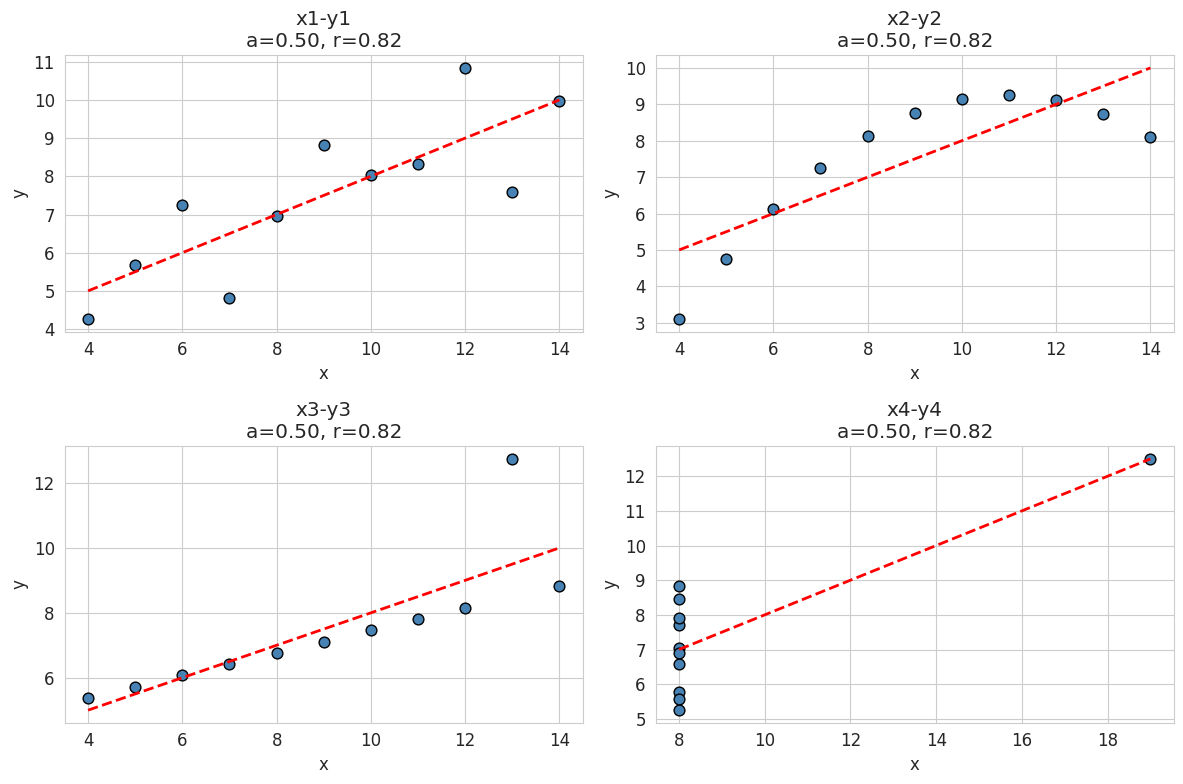


Wyniki regresji i korelacji:
x1-y1: a=0.50, b=3.00, r=0.82
x2-y2: a=0.50, b=3.00, r=0.82
x3-y3: a=0.50, b=3.00, r=0.82
x4-y4: a=0.50, b=3.00, r=0.82


In [150]:
# ---------- Zadanie 3 ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv("anscombe (1).csv", sep=",|\t", engine="python", skiprows=1)
df.columns = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]

for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna()

print("Pierwsze wiersze danych:")
print(df.head())

pairs = [("x1", "y1"), ("x2", "y2"), ("x3", "y3"), ("x4", "y4")]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

results = {}

for i, (xcol, ycol) in enumerate(pairs):
    x = df[xcol].dropna()
    y = df[ycol].dropna()


    axes[i].scatter(x, y, color="steelblue", s=60, edgecolor="black")


    a, b = np.polyfit(x, y, 1)
    xx = np.linspace(x.min(), x.max(), 100)
    yy = a * xx + b
    axes[i].plot(xx, yy, "r--", lw=2)


    r, _ = stats.pearsonr(x, y)

    axes[i].set_title(f"{xcol}-{ycol}\na={a:.2f}, r={r:.2f}")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")


    results[(xcol, ycol)] = (a, b, r)


for j in range(len(pairs), 4):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# wypisanie wyników
print("\nWyniki regresji i korelacji:")
for (xcol, ycol), (a, b, r) in results.items():
    print(f"{xcol}-{ycol}: a={a:.2f}, b={b:.2f}, r={r:.2f}")
